#  A COMPARATIVE ANALYSIS OF MACHINE LEARNING ALGORITHMS FOR PREDICTION OF SOLAR GENERATION

These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results
The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
The date in yyyy-mm-dd format
The local time of day in hh:mm:ss 24-hour format
The numeric data, if any (may be an empty string)
The text data, if any (may be an empty string)

The units of each dataset are:

Solar radiation: watts per meter^2

Temperature: degrees Fahrenheit

Humidity: percent

Barometric pressure: Hg

Wind direction: degrees

Wind speed: miles per hour

Sunrise/sunset: Hawaii time

Data can be downloaded from this link: https://www.kaggle.com/dronio/SolarEnergy

In [ ]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas

In [8]:
#import the data file
df=pd.read_csv("SolarPrediction.csv")
#print(df1)

In [3]:
df.info()
print("\n")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB




,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
df.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [5]:
#step 3
print(df.describe())

           UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%         

# Step 1 Pre Process

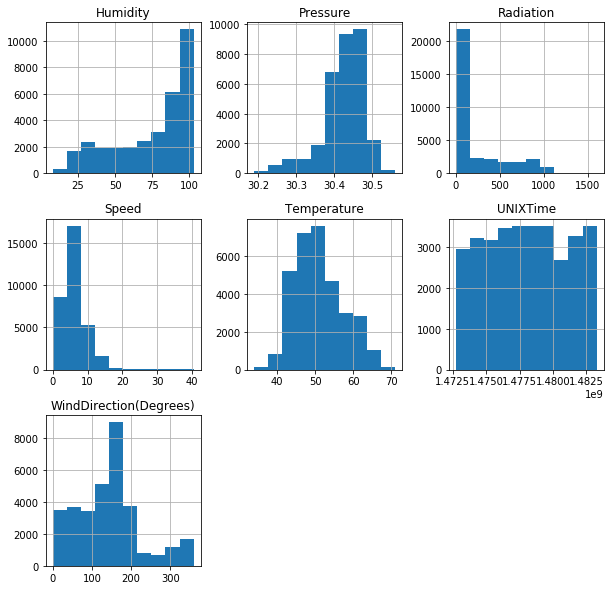

In [9]:
df.hist(figsize=(10,10))
plt.show()

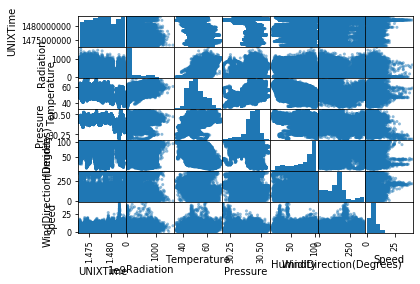

In [9]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [10]:
#step 6
c=df.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                          UNIXTime  Radiation  Temperature  Pressure  Humidity  \
UNIXTime                1.000000  -0.081286    -0.369169 -0.332016 -0.063117   
Radiation              -0.081286   1.000000     0.734955  0.119016 -0.226171   
Temperature            -0.369169   0.734955     1.000000  0.311173 -0.285055   
Pressure               -0.332016   0.119016     0.311173  1.000000 -0.223973   
Humidity               -0.063117  -0.226171    -0.285055 -0.223973  1.000000   
WindDirection(Degrees)  0.152613  -0.230324    -0.259421 -0.229010 -0.001833   
Speed                   0.173860   0.073627    -0.031458 -0.083639 -0.211624   

                        WindDirection(Degrees)     Speed  
UNIXTime                              0.152613  0.173860  
Radiation                            -0.230324  0.073627  
Temperature                          -0.259421 -0.031458  
Pressure                             -0.229010 -0.083639  
Humidity                             -0

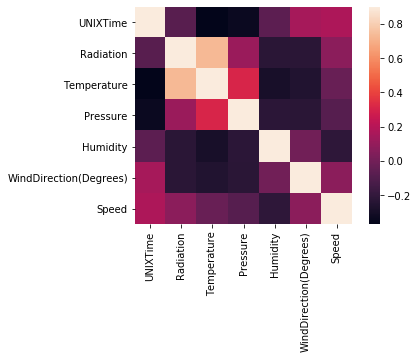

In [11]:
#step -7

#Correlation map to see how features are correlated with radiation
corrmat = df.corr()
plt.subplots()
#figsize=(12,9)
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [12]:
# step-8
# TimeSunRise and TimeSunSet columns are used to find length of the day.
#It is then converted into seconds
# ie the length of the day is measured in seconds
time1=df[['TimeSunRise']].values
time2=df[['TimeSunSet']].values
i=0
DayLen=[]
for i in range(len(time1)):
    temp1=(int(time1[i][0][0:2])*3600+int(time1[i][0][3:5])*60+int(time1[i][0][6:8]))
    temp2=(int(time2[i][0][0:2])*3600+int(time2[i][0][3:5])*60+int(time2[i][0][6:8]))
    DayLen.append(temp2-temp1)
    
DayLen
df['DayLengthinsec']=DayLen

In [14]:
# step-9
# The time variable is converted into seconds.
#the time at which data was collected
time=df[['Time']].values
#print(time[0][0][0:2]) #hour
#print(time[0][0][3:5]) #min
#print(time[0][0][6:8]) #second

i=0
TimeX=[]
for i in range(len(time)):
    temp=(int(time[i][0][0:2])*3600+int(time[i][0][3:5])*60+int(time[i][0][6:8]))
    TimeX.append(temp)

TimeX
df['time_in_sec']=TimeX

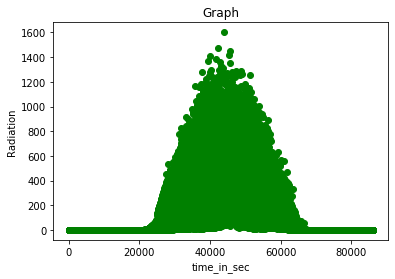

In [16]:
# step-10
# graph is plotted between time and radiation
# it comes out as perfectly skewed

plt.scatter(df.time_in_sec,df.Radiation,color='green')
plt.xlabel("time_in_sec")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [17]:
# step-12

model=smf.ols('Radiation ~ Temperature+ Humidity +Humidity*Temperature', df) 
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2336.4971     27.626    -84.575      0.000   -2390.646   -2282.349
Temperature             49.7311      0.515     96.473      0.000      48.721      50.741
Humidity                 9.8844      0.386     25.588      0.000       9.127      10.642
Humidity:Temperature    -0.1952      0.007    -26.356      0.000      -0.210      -0.181


In [18]:
## step-13
# therefore we make it a new data frame
Temp_multiply_humid=df.Humidity *df.Temperature
df['Temp_multiply_humid']=Temp_multiply_humid

In [24]:
#step 14
df['Month']=[d.split('/')[0] for d in df.Data]
df['Day_of_month']=[d.split('/')[1] for d in df.Data]

In [19]:
#step 15
df['wind_dir'] = df['WindDirection(Degrees)']

In [26]:
#step 16
#We drop the following columns
df = df.drop(['UNIXTime','Data','TimeSunRise','TimeSunSet','WindDirection(Degrees)'], axis=1)

In [24]:
#step 18
#We now check the data-set
print(df.columns)

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid',
       'wind_dir'],
      dtype='object')


In [29]:
#step 19
c=df.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                       Radiation  Temperature  Pressure  Humidity     Speed  \
Radiation             1.000000     0.734955  0.119016 -0.226171  0.073627   
Temperature           0.734955     1.000000  0.311173 -0.285055 -0.031458   
Pressure              0.119016     0.311173  1.000000 -0.223973 -0.083639   
Humidity             -0.226171    -0.285055 -0.223973  1.000000 -0.211624   
Speed                 0.073627    -0.031458 -0.083639 -0.211624  1.000000   
DayLengthinsec        0.073456     0.355509  0.278614  0.087356 -0.174944   
time_in_sec           0.013143     0.204372  0.090749  0.077038 -0.057445   
Temp_multiply_humid  -0.020549     0.011732 -0.124006  0.947963 -0.225835   
Month                -0.035496    -0.010335 -0.199199  0.072388 -0.035145   
Day_of_month         -0.025539    -0.070179 -0.062723  0.052788 -0.075062   
wind_dir             -0.230324    -0.259421 -0.229010 -0.001833  0.073092   

                     DayLengthinsec  time_in_sec  

In [25]:
c=df['Pressure'].corr(df['Speed'])
print("The correlation matrix: ",c)

The correlation matrix:  -0.08363929418151313


In [26]:
Presssure_multiply_speed=df.Pressure *df.Speed
df['Presssure_multiply_speed']=Presssure_multiply_speed

In [32]:
c=df['Month'].corr(df['Humidity'])
print("The correlation matrix: ",c)

The correlation matrix:  0.07238769376476024


In [33]:
Month_multiply_Temperature=df.Temperature *df.Month
df['Month_multiply_Temperature']=Month_multiply_Temperature

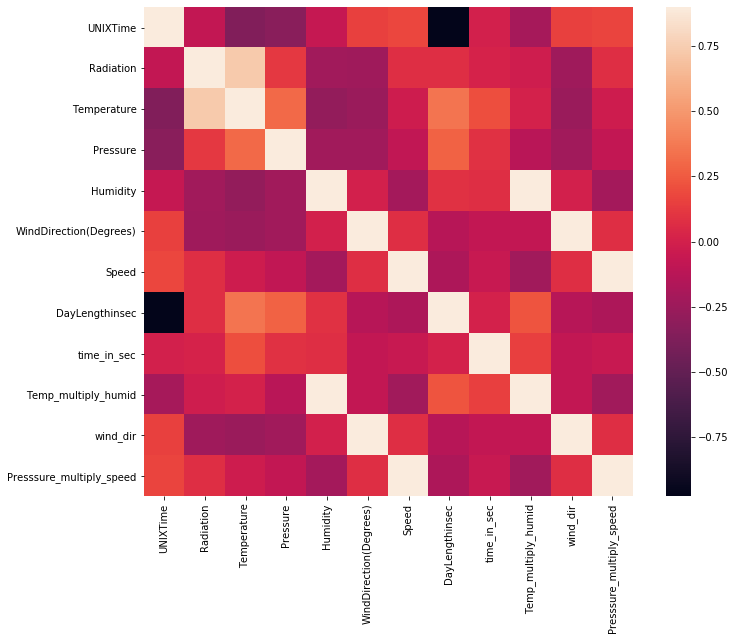

In [27]:
#Correlation map to see how features are correlated with Radiation
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [35]:
pclass_group=df.groupby(['Month']).mean()
print(pclass_group)

        Radiation  Temperature   Pressure   Humidity     Speed  \
Month                                                            
0      230.582292    52.468654  30.438463  78.946378  5.880243   
1      226.727750    50.785007  30.445780  62.384959  6.852886   
2      141.283240    47.608893  30.374428  79.526458  6.733328   
3      229.804828    53.681138  30.432098  79.485776  5.457367   

       DayLengthinsec  time_in_sec  Temp_multiply_humid  Day_of_month  \
Month                                                                   
0        42065.502777  4211.301666          4083.771454     15.006008   
1        40351.122646  4148.892685          3099.453404     14.366731   
2        39428.098971  4200.959946          3760.574351     13.842479   
3        44096.076581  4214.919240          4233.860725     14.134556   

         wind_dir  Presssure_multiply_speed  Month_multiply_Temperature  
Month                                                                    
0      126.03685

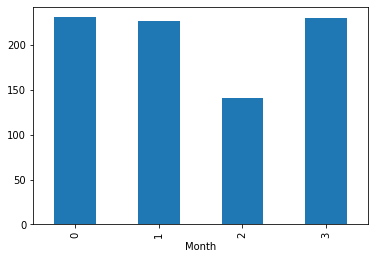

In [36]:
pclass_group['Radiation'].plot.bar()
plt.show()

In [37]:
#We drop the following columns
df = df.drop(['Time'], axis=1)

# Train and Test

In [29]:
from sklearn.model_selection import train_test_split
X=df[['Temperature', 'Pressure', 'Humidity', 'Speed',
     'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 
       'wind_dir',]]


Y=df.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

In [30]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test) 
MSE=mean_squared_error(Y_test,Target_predicted) 
print('mean square error', MSE)

Score:  0.6204710002875158
mean square error 37504.873939162055


# Step 2 Data Visualization

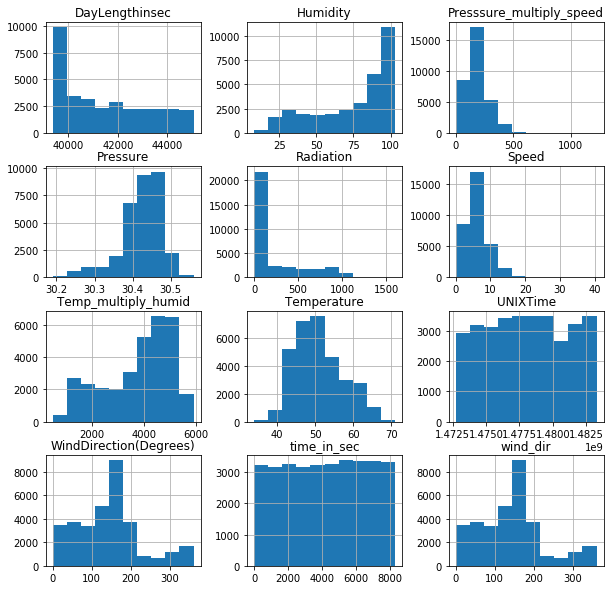

In [31]:
df.hist(figsize=(10,10))
plt.show()

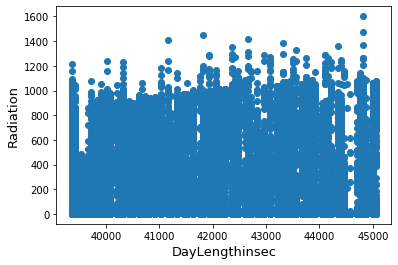

In [43]:
fig, ax = plt.subplots()
ax.scatter(x = df['DayLengthinsec'], y = df['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('DayLengthinsec', fontsize=13)
plt.show()

In [44]:
df= df.drop(df[(df['Radiation']>1400)].index)

In [45]:
df= df.drop(df[(df['wind_dir']>8000)].index)

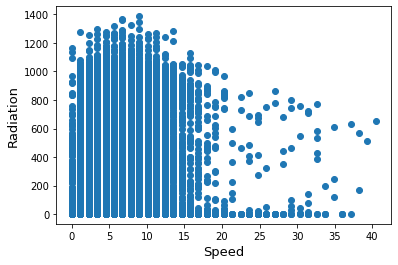

In [46]:
fig, ax = plt.subplots()
ax.scatter(x = df['Speed'], y = df['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Speed', fontsize=13)
plt.show()

In [47]:
df= df.drop(df[(df['Speed']>35)].index)

In [48]:
print(df.shape)

(32672, 13)


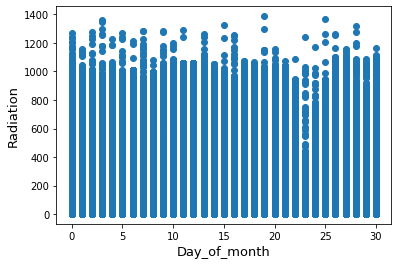

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = df['Day_of_month'], y = df['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Day_of_month', fontsize=13)
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [40]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Radiation'] = Target_predicted
sub.to_csv('SolarPrediction.csv',index=False)

In [41]:
X=df[['Temperature', 'Pressure', 'Humidity', 'Speed',
       'DayLengthinsec', 'time_in_sec', 'Temp_multiply_humid', 
       'wind_dir',]]
Y=df.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 
    MSE=mean_squared_error(Y_test,Target_predicted) 
    print('mean square error', MSE)

# Random Forest

In [42]:
RandomForest = RandomForestRegressor(n_estimators=300, random_state=0).fit(X_train, Y_train)

In [43]:
# scores
model_score_error(RandomForest)

Score:  0.9313959733168413
mean square error 6799.1878187607645


# Decision Tree

In [44]:
DTregressor = DecisionTreeRegressor(random_state=0).fit(X_train, Y_train)

In [45]:
# scores
model_score_error(DTregressor)

Score:  0.8654033024590941
mean square error 13339.57014785854


# Final Result

In [ ]:
#Linear Regrassion
Score:  0.6204710002875158
mean square error 37504.873939162055
#RNN 
Score:  0.9313959733168413
mean square error 6799.1878187607645
#Decision Tree
Score:  0.8654033024590941
mean square error 13339.57014785854